![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yovany\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yovany\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [5]:
# Visualización datos de test
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [6]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)

X_dtm = vect.fit_transform(list(dataTraining['plot']))
X_dtm.shape

(7895, 1000)

In [7]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [11]:
# Definición y entrenamiento con RandomForestClassifier
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=1000, max_depth=15, random_state=42))
# clf.fit(X_train, y_train_genres)
#radom search
from sklearn.model_selection import RandomizedSearchCV
clf_rd_search = RandomizedSearchCV(estimator=clf, param_distributions={"estimator__n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                                                                 "estimator__max_depth": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
                                n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
clf_rd_search.fit(X_train, y_train_genres)

# Predicción del modelo de clasificación
y_pred_genres = clf_rd_search.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf_rd_search.predict_proba(X_test_dtm)

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.102433,0.089200,0.016135,0.026539,0.378004,0.093322,0.030845,0.516810,0.052226,0.100006,...,0.020744,0.057114,0.0000,0.457662,0.043050,0.008722,0.010559,0.164493,0.016420,0.017638
4,0.109363,0.067725,0.019509,0.098532,0.334982,0.237513,0.086948,0.529704,0.052297,0.055246,...,0.026609,0.047309,0.0025,0.121802,0.045834,0.011903,0.013939,0.183248,0.035113,0.023063
5,0.224344,0.142672,0.017012,0.061318,0.313681,0.479785,0.030641,0.617620,0.096925,0.148267,...,0.012921,0.367612,0.0000,0.376033,0.159598,0.005320,0.045115,0.452098,0.093118,0.019024
6,0.136147,0.136709,0.013855,0.086722,0.307511,0.124552,0.014786,0.561729,0.068093,0.057512,...,0.133178,0.097729,0.0000,0.208352,0.158221,0.000772,0.050405,0.252539,0.110753,0.025594
7,0.198514,0.165716,0.030588,0.027476,0.261555,0.226851,0.013398,0.410575,0.084328,0.145263,...,0.016912,0.101192,0.0000,0.154626,0.275861,0.005428,0.012555,0.249739,0.016535,0.011264


In [12]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM
from livelossplot import PlotLossesKeras
%matplotlib inline

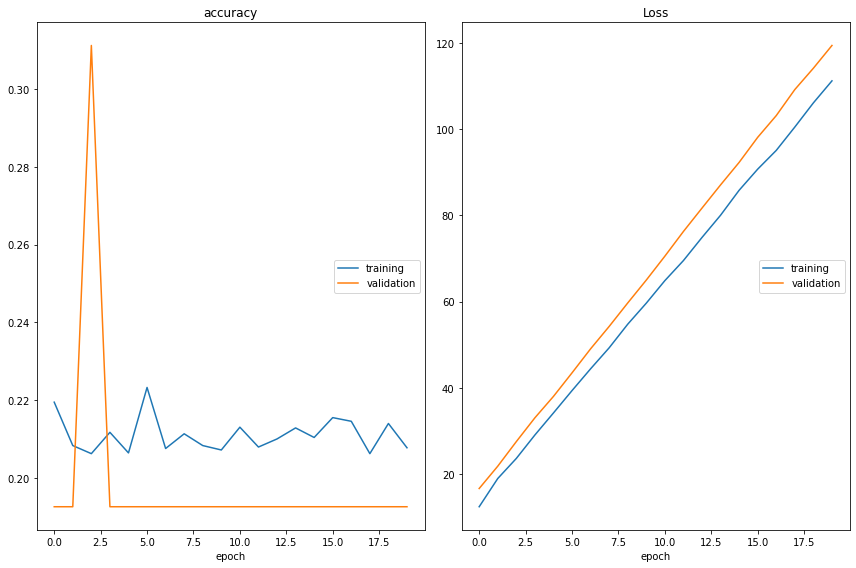

accuracy
	training         	 (min:    0.206, max:    0.223, cur:    0.208)
	validation       	 (min:    0.193, max:    0.311, cur:    0.193)
Loss
	training         	 (min:   12.411, max:  111.221, cur:  111.221)
	validation       	 (min:   16.640, max:  119.433, cur:  119.433)
441/441 - 3s - loss: 111.2210 - accuracy: 0.2078 - val_loss: 119.4332 - val_accuracy: 0.1926 - 3s/epoch - 7ms/step
82/82 [==============================] - 1s 3ms/step


0.4956709597779265

In [13]:
X_train_model = X_train.toarray()
X_test_model = X_test.toarray()



X_train_model = X_train_model.reshape(X_train_model.shape[0], 1, X_train_model.shape[1])
X_test_model = X_test_model.reshape(X_test_model.shape[0], 1, X_test_model.shape[1])

clf = Sequential()
clf.add(LSTM(units=250, input_shape=(X_train_model.shape[1], X_train_model.shape[2])))
clf.add(Dropout(0.2))
clf.add(Dense(y_train_genres.shape[1], activation='softmax'))

clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
clf.fit(X_train_model, y_train_genres, validation_data=(X_test_model, y_test_genres), epochs=20, batch_size=12, verbose=2,callbacks=[PlotLossesKeras()])


roc_auc_score(y_test_genres, clf.predict(X_test_model))

In [ ]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas_verbs(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

In [14]:
# tokenize dataTraining['plot'] with google bert
vec = CountVectorizer(tokenizer=lambda x: x.split())
#vec = CountVectorizer(tokenizer=split_into_lemmas_verbs, max_features=1000)
X_dtm = vec.fit_transform(list(dataTraining['plot']))
X_dtm.shape

(7895, 38734)

In [15]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vec.transform(list(dataTesting['plot']))  
X_test_dtm.shape

(3383, 38734)

In [16]:
# Predicción del conjunto de test
y_pred_test_genres = clf.predict(X_test_dtm)

ValueError: in user code:

    File "C:\Users\Yovany\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Yovany\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Yovany\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Yovany\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\Yovany\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Yovany\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 1, 1000), found shape=(None, 38734)


In [ ]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']


In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()